In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving post-operative.data to post-operative.data


In [ ]:
Data Description:
    - L-CORE (patient's internal temperature in C):
      high (> 37), mid (> = 36 and <= 37), low (<36)
    - L-SURF (patient's skin surface temperature in C):
      high (> 36.5), mid (> = 36.5 and <= 35), low (<35)
    - L-O2 (oxygen saturation in%):
      excellent (> = 98), good (> = 90 and <98), fair (> = 80 and <90), poor (<80)
    - L-BP (last blood pressure reading):
      high (> 130/90), mid (<= 130/90 and> = 90/70), low (<90/70)
    - SURF-STBL (stabilizes the patient's surface temperature):
       stable, mod-stable, unstable
    - CORE-STBL (stabilizes the patient's temperature):
       stable, mod-stable, unstable
    - BP-STBL (stabilizes the patient's blood pressure):
      stable, mod-stable, unstable
    COMFORT (patient comfort at discharge, measured as an integer between 0 and 20)
    - ADM-DECS decision (discharge decision):
      I (patient referred to an Intensive Care Unit),
      S (patient preparing to go home),
      A (patient is taken to the floor general hospital)

In [ ]:
import pandas as pd
import io

dataframe = pd.read_csv(io.StringIO(uploaded['post-operative.data'].decode('utf-8')), names=["L-CORE", "L-SURF", "L-O2", "L-BP", "SURF-STBL", "CORE-STBL", "BP-STBL", "COMFORT", "ADM-DECS"])
dataframe

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A
...,...,...,...,...,...,...,...,...,...
85,mid,mid,excellent,mid,unstable,stable,stable,10,A
86,mid,mid,excellent,mid,unstable,stable,stable,15,S
87,mid,mid,good,mid,unstable,stable,stable,15,A
88,mid,mid,excellent,mid,unstable,stable,stable,10,A


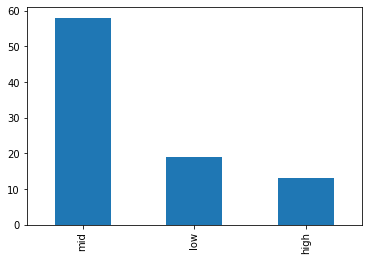

In [ ]:
dataframe['L-CORE'].value_counts().plot(kind='bar')

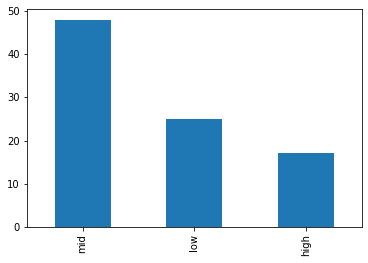

In [ ]:
dataframe['L-SURF'].value_counts().plot(kind='bar')

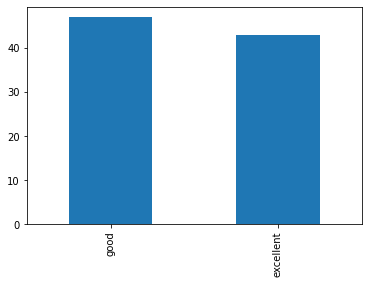

In [ ]:
dataframe['L-O2'].value_counts().plot(kind='bar')

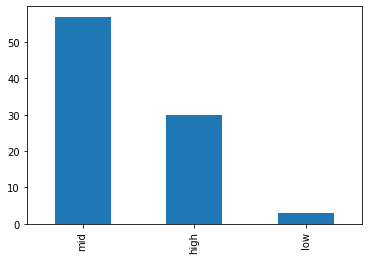

In [ ]:
dataframe['L-BP'].value_counts().plot(kind='bar')

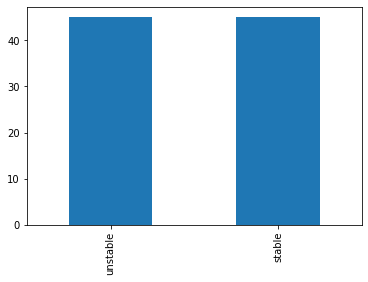

In [ ]:
dataframe['SURF-STBL'].value_counts().plot(kind='bar')

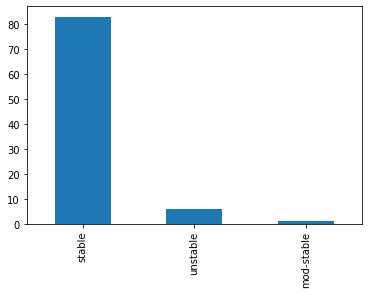

In [ ]:
dataframe['CORE-STBL'].value_counts().plot(kind='bar')

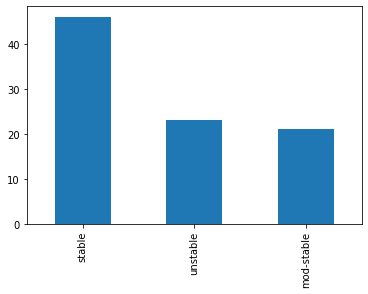

In [ ]:
dataframe['BP-STBL'].value_counts().plot(kind='bar')

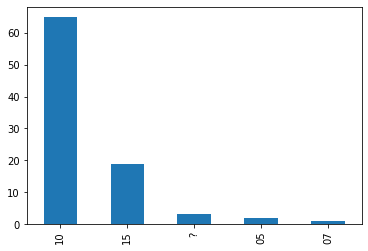

In [ ]:
dataframe['COMFORT'].value_counts().plot(kind='bar')

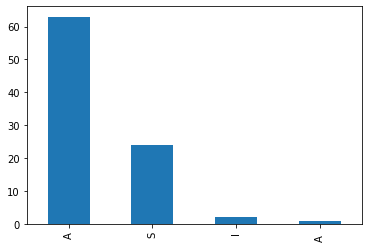

In [ ]:
dataframe['ADM-DECS'].value_counts().plot(kind='bar')

In [ ]:
# Handling missing data
countLcore=0
for i in dataframe['L-CORE']:
  if i == '?':
    countLcore = countLcore + 1
print ('Count of "?" in L-CORE: ' + str(countLcore))

countLsurf=0
for i in dataframe['L-SURF']:
  if i == '?':
    countLsurf = countLcore + 1
print ('Count of "?" in L-SURF: ' + str(countLsurf))

countLo2=0
for i in dataframe['L-O2']:
  if i == '?':
    countLo2 = countLo2 + 1
print ('Count of "?" in L-O2: ' + str(countLo2))

countLbp=0
for i in dataframe['L-BP']:
  if i == '?':
    countLbp = countLbp + 1
print ('Count of "?" in L-BP: ' + str(countLbp))

countSurfStbl=0
for i in dataframe['SURF-STBL']:
  if i == '?':
    countSurfStbl = countSurfStbl + 1
print ('Count of "?" in SURF-STBL: ' + str(countSurfStbl))

countCoreStbl=0
for i in dataframe['CORE-STBL']:
  if i == '?':
    countCoreStbl = countCoreStbl + 1
print ('Count of "?" in CORE-STBL: ' + str(countCoreStbl))


countBpStbl=0
for i in dataframe['BP-STBL']:
  if i == '?':
    countBpStbl = countBpStbl + 1
print ('Count of "?" in BP-STBL: ' + str(countBpStbl))

countComfort=0
for i in dataframe['COMFORT']:
  if i == '?':
    countComfort = countComfort + 1
print ('Count of "?" in COMFORT: ' + str(countComfort))

countAdmDecs=0
for i in dataframe['ADM-DECS']:
  if i == '?':
    countAdmDecs = countAdmDecs + 1
print ('Count of "?" in ADM-DECS: ' + str(countAdmDecs))

Count of "?" in L-CORE: 0
Count of "?" in L-SURF: 0
Count of "?" in L-O2: 0
Count of "?" in L-BP: 0
Count of "?" in SURF-STBL: 0
Count of "?" in CORE-STBL: 0
Count of "?" in BP-STBL: 0
Count of "?" in COMFORT: 3
Count of "?" in ADM-DECS: 0


In [ ]:
index=0
print('Các dòng bị missing data: ')
for row in dataframe.itertuples():
  for column in row:
    if column=='?':
      print(index)
  index = index+1

Các dòng bị missing data: 
46
48
70


In [ ]:
dataframe.iloc[[46]]

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
46,low,mid,good,high,unstable,stable,stable,?,I


In [ ]:
dataframe.iloc[[48]]

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
48,high,high,excellent,high,stable,stable,unstable,?,A


In [ ]:
dataframe.iloc[[70]]

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
70,mid,low,excellent,mid,unstable,unstable,unstable,?,A


In [ ]:
dataframe1=dataframe
dataframe1

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A
...,...,...,...,...,...,...,...,...,...
85,mid,mid,excellent,mid,unstable,stable,stable,10,A
86,mid,mid,excellent,mid,unstable,stable,stable,15,S
87,mid,mid,good,mid,unstable,stable,stable,15,A
88,mid,mid,excellent,mid,unstable,stable,stable,10,A


In [ ]:
dataframe1=dataframe1.drop(labels=[46,48,70], axis=0)
dataframe1

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A
...,...,...,...,...,...,...,...,...,...
85,mid,mid,excellent,mid,unstable,stable,stable,10,A
86,mid,mid,excellent,mid,unstable,stable,stable,15,S
87,mid,mid,good,mid,unstable,stable,stable,15,A
88,mid,mid,excellent,mid,unstable,stable,stable,10,A


In [ ]:
# Standardized data

In [ ]:
X = dataframe1.values[:,:-1]
y = dataframe1.values[:,-1]
print(X)
print(y)

[['mid' 'low' 'excellent' 'mid' 'stable' 'stable' 'stable' '15']
 ['mid' 'high' 'excellent' 'high' 'stable' 'stable' 'stable' '10']
 ['high' 'low' 'excellent' 'high' 'stable' 'stable' 'mod-stable' '10']
 ['mid' 'low' 'good' 'high' 'stable' 'unstable' 'mod-stable' '15']
 ['mid' 'mid' 'excellent' 'high' 'stable' 'stable' 'stable' '10']
 ['high' 'low' 'good' 'mid' 'stable' 'stable' 'unstable' '15']
 ['mid' 'low' 'excellent' 'high' 'stable' 'stable' 'mod-stable' '05']
 ['high' 'mid' 'excellent' 'mid' 'unstable' 'unstable' 'stable' '10']
 ['mid' 'high' 'good' 'mid' 'stable' 'stable' 'stable' '10']
 ['mid' 'low' 'excellent' 'mid' 'unstable' 'stable' 'mod-stable' '10']
 ['mid' 'mid' 'good' 'mid' 'stable' 'stable' 'stable' '15']
 ['mid' 'low' 'good' 'high' 'stable' 'stable' 'mod-stable' '10']
 ['high' 'high' 'excellent' 'high' 'unstable' 'stable' 'unstable' '15']
 ['mid' 'high' 'good' 'mid' 'unstable' 'stable' 'mod-stable' '10']
 ['mid' 'low' 'good' 'high' 'unstable' 'unstable' 'stable' '15']


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in range(X.shape[1]):
    X[:,i] = encoder.fit_transform(X[:,i])
print(X)

[[2 1 0 2 0 1 1 3]
 [2 0 0 0 0 1 1 2]
 [0 1 0 0 0 1 0 2]
 [2 1 1 0 0 2 0 3]
 [2 2 0 0 0 1 1 2]
 [0 1 1 2 0 1 2 3]
 [2 1 0 0 0 1 0 0]
 [0 2 0 2 1 2 1 2]
 [2 0 1 2 0 1 1 2]
 [2 1 0 2 1 1 0 2]
 [2 2 1 2 0 1 1 3]
 [2 1 1 0 0 1 0 2]
 [0 0 0 0 1 1 2 3]
 [2 0 1 2 1 1 0 2]
 [2 1 1 0 1 2 1 3]
 [0 0 0 0 1 1 2 2]
 [1 0 1 0 1 1 0 3]
 [2 1 1 0 1 1 1 2]
 [2 0 1 2 1 1 2 3]
 [2 2 1 2 0 1 1 2]
 [1 0 1 2 1 1 1 3]
 [1 2 0 0 1 1 2 2]
 [2 2 1 2 1 1 2 3]
 [2 2 1 2 1 1 1 2]
 [0 0 1 2 0 1 0 2]
 [1 2 1 2 1 1 1 2]
 [0 2 1 1 0 1 0 2]
 [1 2 0 0 0 1 0 2]
 [2 2 0 2 0 1 2 3]
 [2 2 1 2 1 1 2 2]
 [2 2 1 0 1 1 1 2]
 [1 1 1 2 1 1 2 2]
 [2 2 0 0 1 1 0 2]
 [2 1 1 2 0 1 1 2]
 [1 2 0 0 0 1 0 2]
 [2 2 1 2 0 1 1 2]
 [1 2 0 2 0 1 1 2]
 [1 1 1 2 1 1 2 2]
 [1 1 1 2 0 1 1 1]
 [2 2 1 0 1 1 0 2]
 [1 1 1 2 1 1 1 2]
 [1 2 1 2 0 1 1 3]
 [0 0 1 0 1 1 1 3]
 [2 2 1 2 0 1 1 2]
 [1 1 0 2 0 1 1 2]
 [1 2 1 2 1 1 1 2]
 [2 2 0 2 1 1 1 2]
 [2 0 1 1 1 1 1 2]
 [2 0 1 2 1 0 0 2]
 [1 0 0 2 1 1 1 2]
 [2 1 0 0 1 1 2 2]
 [2 2 1 2 1 1 0 2]
 [0 0 0 2 1 

In [ ]:
X_train_Nb = X[:60,:]
y_train_Nb = y[:60]
X_test_Nb = X[60:,:]
y_test_Nb = y[60:]

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_MulNB = MultinomialNB()
model_MulNB.fit(X_train_Nb,y_train_Nb)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred_MulNb = model_MulNB.predict(X_test_Nb)
print(y_pred_MulNb)
print(y_test_Nb)

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']
['A' 'S' 'A' 'S' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A'
 'S' 'I' 'A' 'A' 'A' 'S' 'A' 'A' 'S']


In [ ]:
from sklearn.naive_bayes import GaussianNB
model_GauNB = GaussianNB()
model_GauNB.fit(X_train_Nb,y_train_Nb)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_GauNB = model_GauNB.predict(X_test_Nb)
print(y_pred_GauNB)
print(y_test_Nb)

['A' 'A' 'S' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A'
 'A' 'A' 'S' 'A' 'A' 'A' 'A' 'A' 'A']
['A' 'S' 'A' 'S' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A'
 'S' 'I' 'A' 'A' 'A' 'S' 'A' 'A' 'S']


In [ ]:
from sklearn.naive_bayes import BernoulliNB
model_BerNB = BernoulliNB()
model_BerNB.fit(X_train_Nb,y_train_Nb)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred_BerNB = model_BerNB.predict(X_test_Nb)
print(y_pred_BerNB)
print(y_test_Nb)

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'S' 'A' 'A' 'A' 'A' 'A' 'A']
['A' 'S' 'A' 'S' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A'
 'S' 'I' 'A' 'A' 'A' 'S' 'A' 'A' 'S']


In [ ]:
# NB accuracy rating

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_MulNb,y_test_Nb))

              precision    recall  f1-score   support

           A       1.00      0.70      0.83        27
           I       0.00      0.00      0.00         0
           S       0.00      0.00      0.00         0

    accuracy                           0.70        27
   macro avg       0.33      0.23      0.28        27
weighted avg       1.00      0.70      0.83        27



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_GauNB,y_test_Nb))


              precision    recall  f1-score   support

           A       0.89      0.71      0.79        24
           I       0.00      0.00      0.00         0
           S       0.14      0.33      0.20         3

    accuracy                           0.67        27
   macro avg       0.35      0.35      0.33        27
weighted avg       0.81      0.67      0.73        27



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_BerNB,y_test_Nb))

              precision    recall  f1-score   support

           A       0.95      0.69      0.80        26
           I       0.00      0.00      0.00         0
           S       0.00      0.00      0.00         1

    accuracy                           0.67        27
   macro avg       0.32      0.23      0.27        27
weighted avg       0.91      0.67      0.77        27



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
